# Reinforcement Learning - Deep Q Network

In [1]:
import random
import torch
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys

assert sys.version_info[:3] >= (3, 6, 0), "Make sure you have Python 3.6 installed!"

In [3]:
import gym

In [4]:
from project.networks import SARSANetwork, DeepQNetwork
from project.policies import EpsilonGreedyPolicy

from project.train_network import train_episodes
from project.test_network import test_episodes

In [5]:
def set_seeds(seed):
    random.seed(seed)
    torch.manual_seed(seed)
    np.random.seed(seed)
    env.seed(seed)

In [6]:
def smooth(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def plot_duration_loss_graph(durations, losses):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(smooth(episode_durations, 10))
    axes[0].set_title('Episode durations per episode')
    axes[1].plot(smooth(losses, 10))
    axes[1].set_title('Gradient loss per episode')
    fig.tight_layout()
    plt.show()

def plot_duration_reward_graph(durations, rewards):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(smooth(episode_durations, 10))
    axes[0].set_title('Episode durations per episode')
    axes[1].plot(smooth(rewards, 10))
    axes[1].set_title('Reward per episode')
    fig.tight_layout()
    plt.show()

## 1. Load Environment

In [7]:
env = gym.envs.make("CartPole-v1")
action_space = env.action_space.n

/Users/xiaojingu/anaconda3/envs/rl2020/lib/python3.7/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


## 2. Deep Q-Network (DQN)

### Training

 Episode 0 finished after 29 steps
 Episode 10 finished after 10 steps
 Episode 20 finished after 11 steps
 Episode 30 finished after 11 steps
 Episode 40 finished after 12 steps
 Episode 50 finished after 10 steps
 Episode 60 finished after 10 steps
 Episode 70 finished after 10 steps
 Episode 80 finished after 10 steps
 Episode 90 finished after 10 steps
 Episode 100 finished after 9 steps
 Episode 110 finished after 9 steps
 Episode 120 finished after 10 steps
 Episode 130 finished after 9 steps
 Episode 140 finished after 10 steps
 Episode 150 finished after 10 steps
 Episode 160 finished after 9 steps
 Episode 170 finished after 11 steps
 Episode 180 finished after 12 steps
 Episode 190 finished after 10 steps


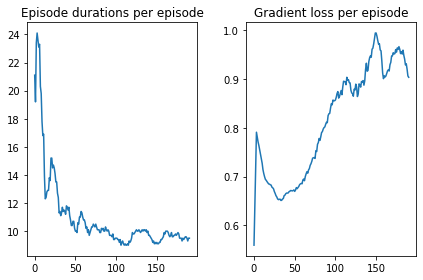

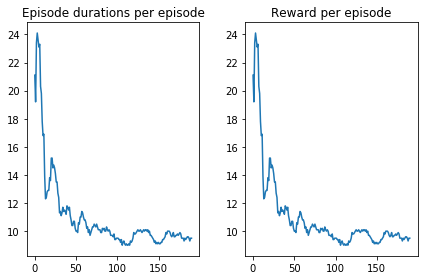

In [8]:
num_episodes = 200
batch_size = 64
discount_factor = 0.8
learn_rate = 1e-3
num_hidden = 128
semi_grad = True
use_replay = True
seed = 42

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

dq_network = DeepQNetwork(in_features=4, out_features=action_space, discount_factor=discount_factor)
dq_policy = EpsilonGreedyPolicy(dq_network)
episode_durations, losses, episode_rewards, _ = train_episodes(env, dq_policy, num_episodes, batch_size, learn_rate, semi_grad=semi_grad, use_replay=use_replay)

plot_duration_loss_graph(episode_durations, losses)
plot_duration_reward_graph(episode_durations, episode_rewards)

### Testing

 Episode 0 finished after 9 steps obtaining 9.0 reward
 Episode 10 finished after 9 steps obtaining 9.0 reward
 Episode 20 finished after 9 steps obtaining 9.0 reward
 Episode 30 finished after 9 steps obtaining 9.0 reward
 Episode 40 finished after 9 steps obtaining 9.0 reward
 Episode 50 finished after 10 steps obtaining 10.0 reward
 Episode 60 finished after 8 steps obtaining 8.0 reward
 Episode 70 finished after 10 steps obtaining 10.0 reward
 Episode 80 finished after 9 steps obtaining 9.0 reward
 Episode 90 finished after 9 steps obtaining 9.0 reward


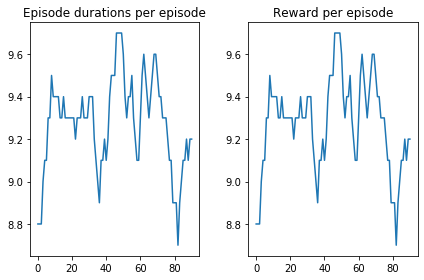

In [9]:
num_episodes = 100
seed = 46

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

episode_durations, episode_rewards = test_episodes(env, dq_policy, num_episodes)

plot_duration_reward_graph(episode_durations, episode_rewards)

## 3. Deep SARSA-Network (DQN)

### Training

 Episode 0 finished after 29 steps
 Episode 10 finished after 12 steps
 Episode 20 finished after 9 steps
 Episode 30 finished after 13 steps
 Episode 40 finished after 10 steps
 Episode 50 finished after 10 steps
 Episode 60 finished after 10 steps
 Episode 70 finished after 14 steps
 Episode 80 finished after 10 steps
 Episode 90 finished after 10 steps
 Episode 100 finished after 9 steps
 Episode 110 finished after 9 steps
 Episode 120 finished after 10 steps
 Episode 130 finished after 9 steps
 Episode 140 finished after 10 steps
 Episode 150 finished after 10 steps
 Episode 160 finished after 9 steps
 Episode 170 finished after 10 steps
 Episode 180 finished after 10 steps
 Episode 190 finished after 10 steps


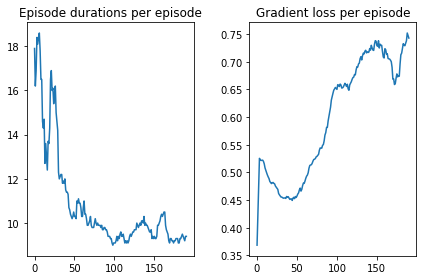

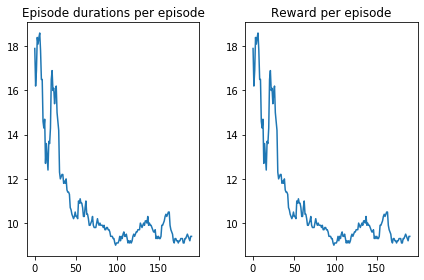

In [10]:
num_episodes = 200
batch_size = 64
discount_factor = 0.8
learn_rate = 1e-3
num_hidden = 128
semi_grad = True
use_replay = True
seed = 42  # This is not randomly chosen

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

sarsa_network = SARSANetwork(in_features=4, out_features=action_space, discount_factor=discount_factor)
sarsa_policy = EpsilonGreedyPolicy(sarsa_network)
episode_durations, losses, episode_rewards, _ = train_episodes(env, sarsa_policy, num_episodes, batch_size, learn_rate, semi_grad=semi_grad, use_replay=use_replay)

plot_duration_loss_graph(episode_durations, losses)
plot_duration_reward_graph(episode_durations, episode_rewards)

### Testing

 Episode 0 finished after 9 steps obtaining 9.0 reward
 Episode 10 finished after 10 steps obtaining 10.0 reward
 Episode 20 finished after 10 steps obtaining 10.0 reward
 Episode 30 finished after 9 steps obtaining 9.0 reward
 Episode 40 finished after 10 steps obtaining 10.0 reward
 Episode 50 finished after 10 steps obtaining 10.0 reward
 Episode 60 finished after 10 steps obtaining 10.0 reward
 Episode 70 finished after 9 steps obtaining 9.0 reward
 Episode 80 finished after 10 steps obtaining 10.0 reward
 Episode 90 finished after 10 steps obtaining 10.0 reward


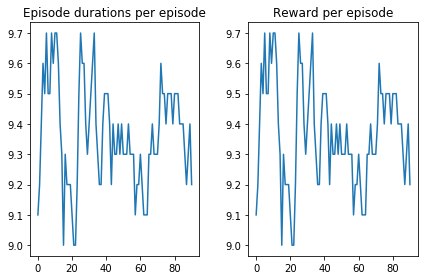

In [11]:
num_episodes = 100
seed = 43

# We will seed the algorithm (before initializing QNetwork!) for reproducibility
set_seeds(seed)

episode_durations, episode_rewards = test_episodes(env, sarsa_policy, num_episodes)

plot_duration_reward_graph(episode_durations, episode_rewards)